<a href="https://colab.research.google.com/github/Lanisha20/ECEN-360/blob/main/Flight_Performance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import required libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
from scipy import stats

# Set display options for better output readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Set plotting style
plt.style.use('ggplot')
sns.set_palette("husl")

# 1. INITIAL DATA EXPLORATION
# Load the dataset --> this will take a few minutes but load in the flight performance dataset.
uploaded = files.upload()
flight_data = list(uploaded.keys())[0]
df = pd.read_csv(flight_data)

Saving flight_data.csv to flight_data (1).csv


<ipython-input-8-d4142035485f>:23: DtypeWarning: Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(flight_data)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537902 entries, 0 to 537901
Columns: 111 entries, Year to Dep_Hour
dtypes: float64(71), int64(21), object(19)
memory usage: 455.5+ MB
None

First few rows of the dataset:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2022        1      1          14          5  2022-01-14                YX   
1  2022        1      1          15          6  2022-01-15                YX   
2  2022        1      1          16          7  2022-01-16                YX   
3  2022        1      1          17          1  2022-01-17                YX   
4  2022        1      1          18          2  2022-01-18                YX   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  \
0                     20452                          YX      N119HQ   
1                     20452                          YX      N122HQ   
2                     20452                          YX      N412YX   


<Figure size 1200x600 with 0 Axes>

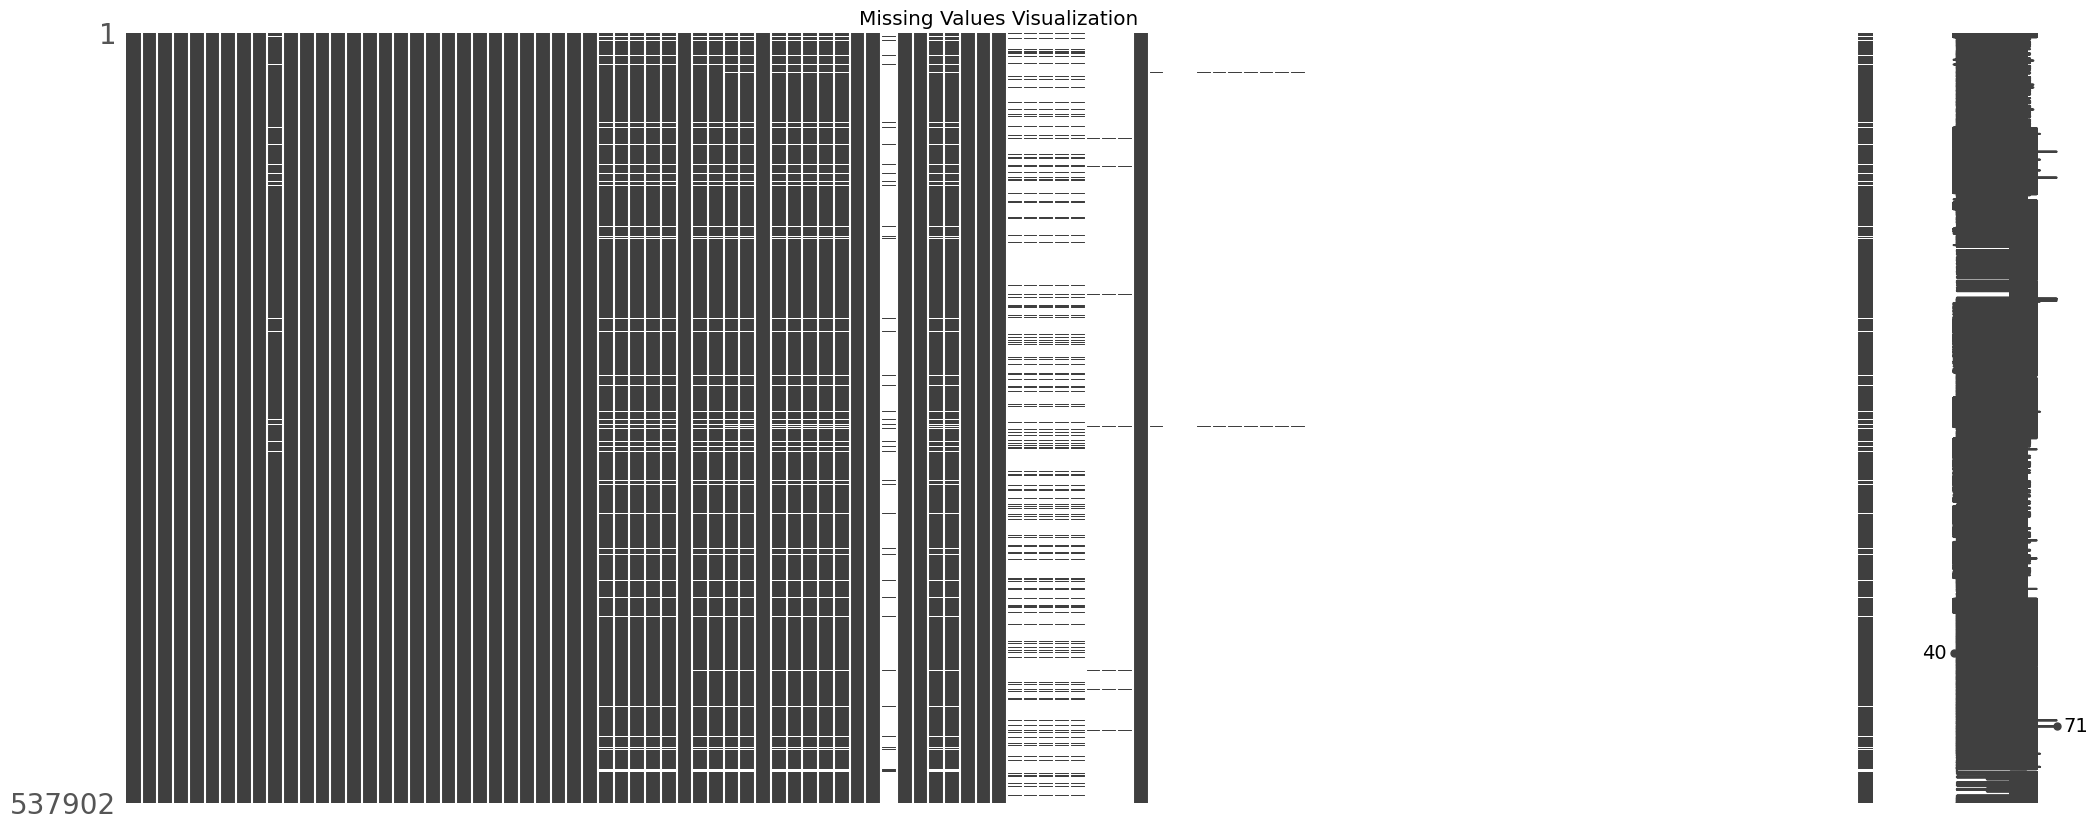

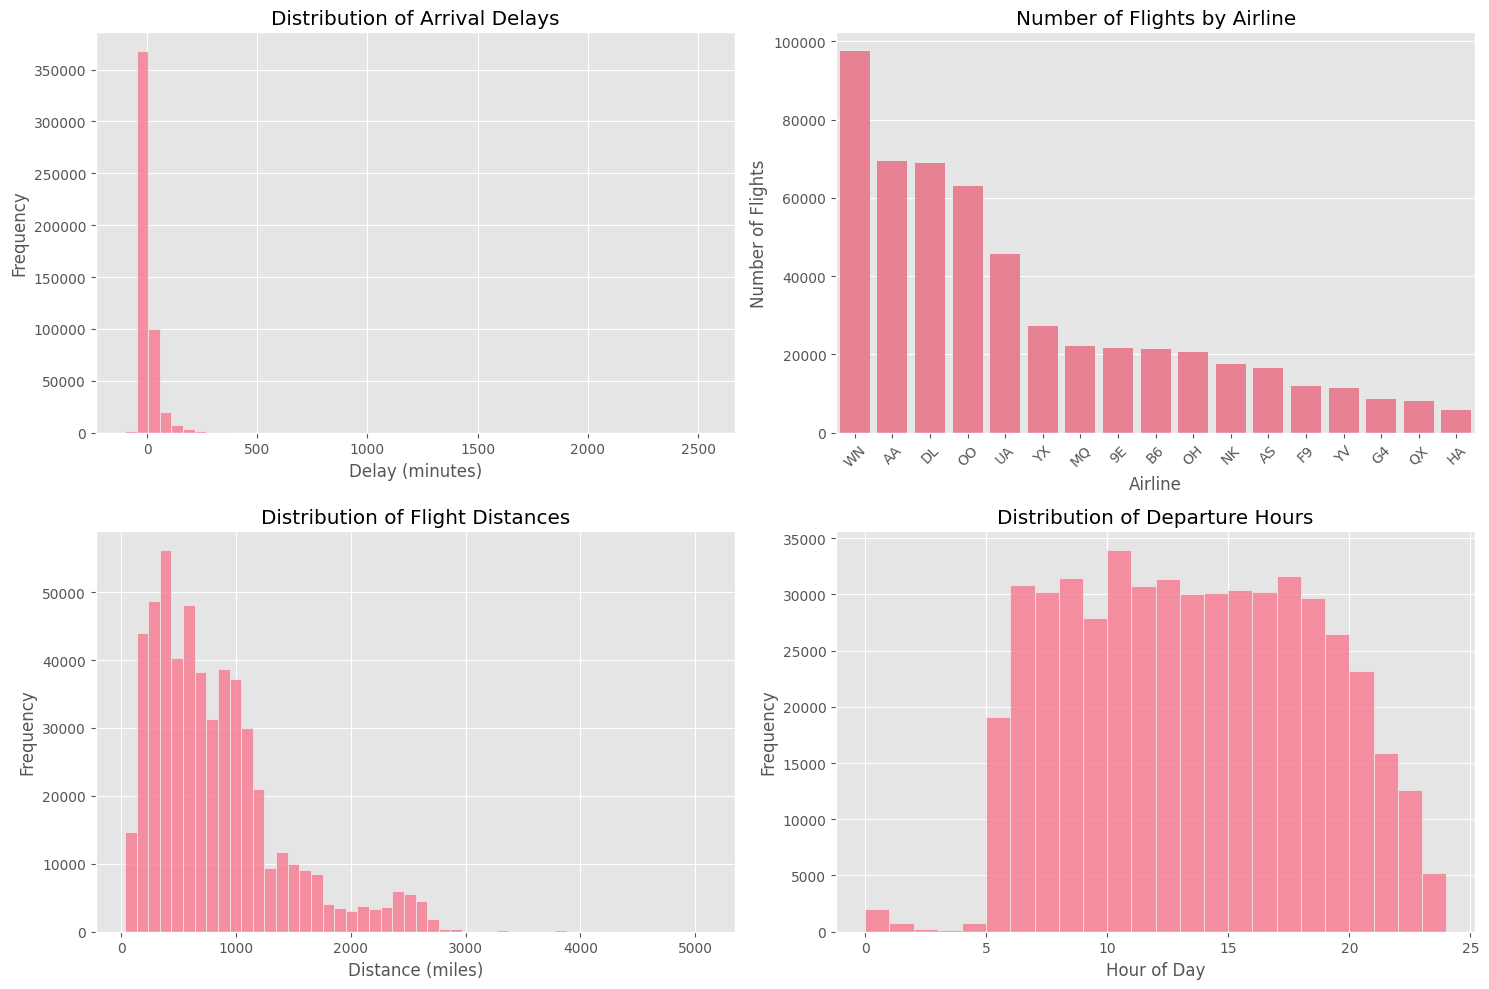

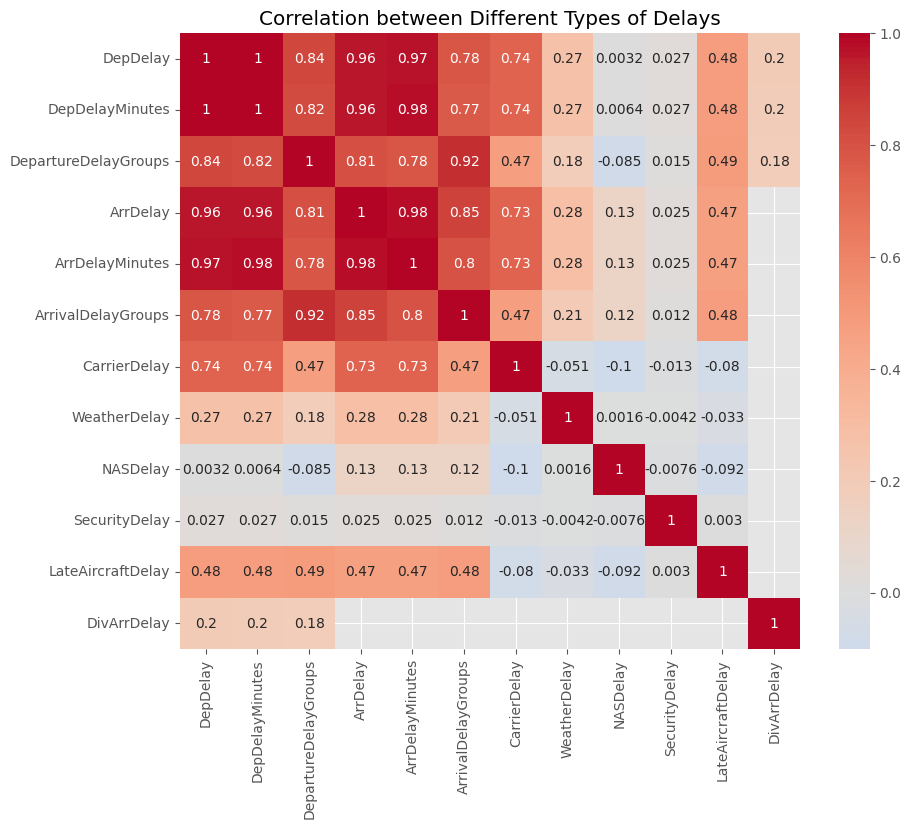

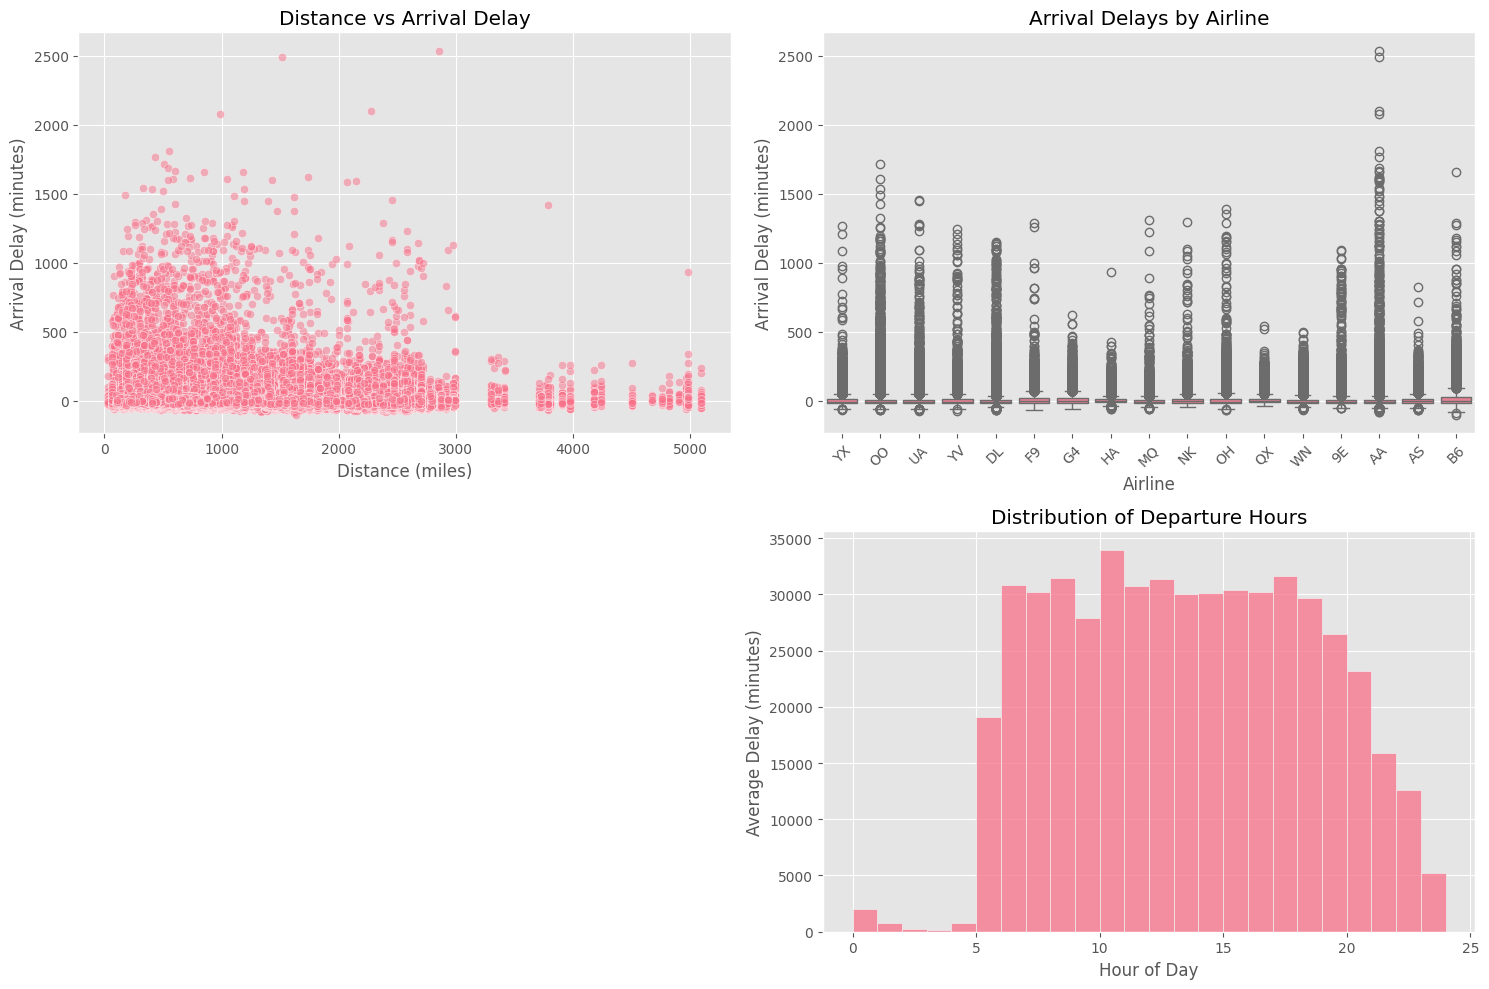


Delay Summary Statistics:
            DepDelay  DepDelayMinutes  DepartureDelayGroups       ArrDelay  \
count  504988.000000    504988.000000         504988.000000  503529.000000   
mean       10.932093        14.404443              0.091081       3.981085   
std        50.084461        48.922464              2.272564      52.442685   
min       -52.000000         0.000000             -2.000000    -100.000000   
25%        -6.000000         0.000000             -1.000000     -17.000000   
50%        -2.000000         0.000000             -1.000000      -8.000000   
75%         8.000000         8.000000              0.000000       7.000000   
max      2512.000000      2512.000000             12.000000    2536.000000   

       ArrDelayMinutes  ArrivalDelayGroups  CarrierDelay  WeatherDelay  \
count    503529.000000       503529.000000  97052.000000  97052.000000   
mean         14.095996           -0.258297     31.296037      4.097556   
std          48.494985            2.431877     7

In [16]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Visualize missing values
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title("Missing Values Visualization")
plt.show()

# 2. UNIVARIATE ANALYSIS
# Create a figure for delay distributions
plt.figure(figsize=(15, 10))

# Arrival Delay Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='ArrDelay', bins=50)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')

# Flights by Airline
plt.subplot(2, 2, 2)
airline_counts = df['Reporting_Airline'].value_counts()
sns.barplot(x=airline_counts.index, y=airline_counts.values)
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

# Flight Distance Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Distance', bins=50)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

# Departure Time Distribution
plt.subplot(2, 2, 4)
df['Dep_Hour'] = df['DepTime'] // 100
sns.histplot(data=df, x='Dep_Hour', bins=24)
plt.title('Distribution of Departure Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. BIVARIATE AND MULTIVARIATE ANALYSIS
# Create correlation matrix for delay-related columns
delay_columns = [col for col in df.columns if 'Delay' in col]
correlation_matrix = df[delay_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Different Types of Delays')
plt.show()

# Distance vs Delays
plt.figure(figsize=(15, 10))

# Scatter plot of Distance vs Arrival Delay
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Distance', y='ArrDelay', alpha=0.5)
plt.title('Distance vs Arrival Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')

# Box plot of Delays by Airline
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Reporting_Airline', y='ArrDelay')
plt.title('Arrival Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)

# Average Delay by Hour
#plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)

# Convert hhmm time format into hours
df['Dep_Hour'] = df['DepTime'] // 100  # If 'DepTime' exists

# Plot histogram
sns.histplot(data=df, x='Dep_Hour', bins=24)
hourly_delays = df.groupby('Dep_Hour')['ArrDelay'].mean()
#sns.lineplot(x=hourly_delays.index, y=hourly_delays.values)
plt.title('Distribution of Departure Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')

# # Delay Types Comparison
# plt.subplot(2, 2, 4)
# delay_types = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
# delay_means = df[delay_types].mean()
# sns.barplot(x=delay_means.index, y=delay_means.values)
# plt.title('Average Delay by Type')
# plt.xticks(rotation=45)
# plt.ylabel('Average Delay (minutes)')

plt.tight_layout()
plt.show()

# 4. ADDITIONAL ANALYSIS
# Calculate summary statistics for delays
print("\nDelay Summary Statistics:")
print(df[delay_columns].describe())

# Calculate percentage of flights delayed
delayed_flights = (df['ArrDelay'] > 15).mean() * 100
print(f"\n Percentage of flights delayed (>15 minutes): {delayed_flights:.2f}%")

# Calculate average delay by airline
airline_delays = df.groupby('Reporting_Airline')['ArrDelay'].agg(['mean', 'count', 'std']).round(2)
print("\n Average Delays by Airline:")
print(airline_delays)

# Create a summary of cancellations
if 'Cancelled' in df.columns:
    cancellation_rate = df['Cancelled'].mean() * 100
    print(f"\nOverall cancellation rate: {cancellation_rate:.2f}%")

    if 'CancellationCode' in df.columns:
        print("\nCancellations by reason:")
        print(df['CancellationCode'].value_counts(normalize=True) * 100)

# Save summary statistics to a file
with open('flight_analysis_summary.txt', 'w') as f:
    f.write("Flight Performance Analysis Summary\n")
    f.write("=================================\n\n")
    f.write(f"Total number of flights: {len(df)}\n")
    f.write(f"Number of airlines: {df['Reporting_Airline'].nunique()}\n")
    f.write(f"Average arrival delay: {df['ArrDelay'].mean():.2f} minutes\n")
    f.write(f"Percentage of delayed flights: {delayed_flights:.2f}%\n")

# Reflection
**Summary:**
By analyzing airline flight performance data, we found clear patterns in flight delays, efficiency, and cancellations. The dataset gave insight into flight schedules, arrival delays, how different airlines perform, and how various delay factors are connected.

**Key Observations:**
- Delays are generally low for most flights, with the majority of flights experiencing minimal or no delays.
- Long tail distribution in arrival delays → A small proportion of flights experience extreme delays (1000+ minutes), which significantly impacts average delay times.
- Southwest Airlines (WN) had the highest number of flights, followed by American Airlines (AA) and Delta (DL).
- Peak departure times occur between 6 AM and 10 PM, with fewer flights overnight.
- Distance vs. Arrival Delay Scatterplot → No strong correlation between longer flights and higher delays; delays are prevalent in short-haul and long-haul flights alike.
- Correlation analysis shows that Departure Delays and Arrival Delays have the highest positive correlation (~0.96), suggesting that departure delays almost directly contribute to late arrivals.


**Actionable Insights & Recommendations**
1. **Improving On-Time Performance:**
    - Airlines should focus on reducing departure delays, as this would directly decrease arrival delays.
    - Buffer times should be optimized, especially for airlines with frequent delays like Spirit, JetBlue, and Frontier.

2. **Reducing Cancellations:**
    - Since operational cancellations (Category B) are the largest contributor, better fleet management and contingency planning can help reduce these cancellations.
    - Bad weather-related cancellations (A) could be minimized by improving scheduling flexibility and proactive rebooking strategies.

3. **Customer Experience Enhancements**
    - Airlines with high average delays should focus on better communication and passenger compensation policies to retain customer trust.
    - Airlines like Delta (DL) and American Airlines (AA) can leverage their strong on-time performance as a competitive advantage.

**Conclusion**

This exploratory data analysis provides a comprehensive look at flight delays and operational efficiency.

- Departure delays are the biggest contributor to arrival delays.
- Certain airlines perform better than others in terms of on-time arrival.
- Cancellations are primarily caused by operational and weather-related factors.

The insights gained from this study can help airlines optimize their schedules, improve customer experience, and minimize delays and cancellations.